
# **A/B Test Analysis in Colab**

## **Import Libraries**



### **Load the Dataset**


In [ ]:
import pandas as pd

df = pd.read_csv('/content/marketing_AB.csv')
df.head()


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

df.info()
df['test_group'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   unnamed:_0     588101 non-null  int64 
 1   user_id        588101 non-null  int64 
 2   test_group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total_ads      588101 non-null  int64 
 5   most_ads_day   588101 non-null  object
 6   most_ads_hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


,count
test_group,
ad,564577
psa,23524


In [ ]:
grouped = df.groupby('test_group')['converted'].agg(['count', 'sum', 'mean']).reset_index()
grouped.columns = ['Group', 'Total Users', 'Conversions', 'Conversion Rate']
grouped


,Group,Total Users,Conversions,Conversion Rate
0,ad,564577,14423,0.025547
1,psa,23524,420,0.017854


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

ad_conv = df[df['test_group'] == 'ad']['converted'].sum()
psa_conv = df[df['test_group'] == 'psa']['converted'].sum()

ad_total = df[df['test_group'] == 'ad'].shape[0]
psa_total = df[df['test_group'] == 'psa'].shape[0]

z_stat, p_val = proportions_ztest([ad_conv, psa_conv], [ad_total, psa_total])
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_val:.4f}")


Z-statistic: 7.370
P-value: 0.0000


<ipython-input-12-0cd0a2d0046c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='test_group', y='converted', data=df, ci=None)


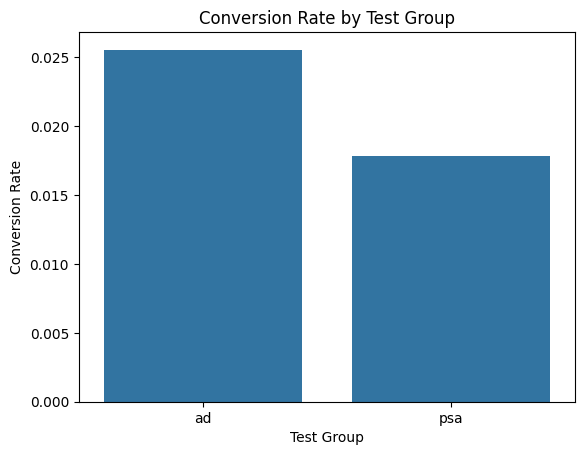

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='test_group', y='converted', data=df, ci=None)
plt.title("Conversion Rate by Test Group")
plt.ylabel("Conversion Rate")
plt.xlabel("Test Group")
plt.show()


<ipython-input-15-8996b00e1b90>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_by_ads = df.groupby(['ads_bin', 'test_group'])['converted'].mean().reset_index()


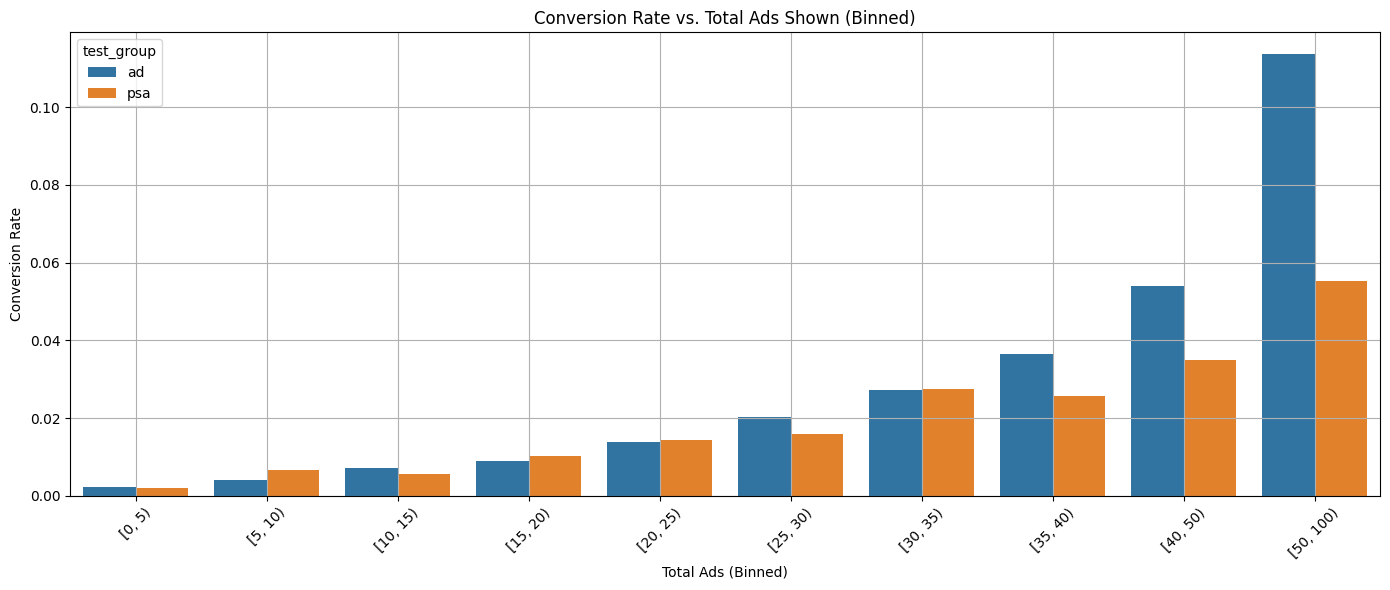

In [ ]:
df['ads_bin'] = pd.cut(df['total_ads'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 100], right=False)
conversion_by_ads = df.groupby(['ads_bin', 'test_group'])['converted'].mean().reset_index()

conversion_by_ads['ads_bin'] = conversion_by_ads['ads_bin'].astype(str)

plt.figure(figsize=(14,6))
sns.barplot(data=conversion_by_ads, x='ads_bin', y='converted', hue='test_group')
plt.title("Conversion Rate vs. Total Ads Shown (Binned)")
plt.ylabel("Conversion Rate")
plt.xlabel("Total Ads (Binned)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# **Summary**
### **In this A/B test analysis:**

We cleaned the dataset to ensure proper alignment between group and landing_page.


We calculated conversion rates for both the control and treatment groups.


Using a one-sided z-test, we tested the null hypothesis that the treatment group does not have a higher conversion rate than the control group.